In [2]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('Data/churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [4]:
clean = df.drop(['area code', 'phone number'], axis=1)
clean['international plan'].replace(['no','yes'], [0,1], inplace = True)
clean['voice mail plan'].replace(['no','yes'], [0,1], inplace = True)
clean['churn'].replace([False, True], [0,1], inplace = True)
clean.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# Looking at entire dataset Churn

In [5]:
clean['churn'].value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

# Based On the final model

Coefficients to visualize:
- `customer service calls`
- `total day minutes`
- `international plans`
- `number vmail messages`
- `total eve charge`
- `total int charge`

# identifying key attributes of those customers who did churn

In [6]:
churn = clean[(clean['churn'] == 1)]
nchurn = clean[(clean['churn'] == 0)]

churn.describe()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.00000,483.000000,483.000000,483.000000,483.0
mean,102.664596,0.283644,0.165631,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.70000,4.163561,2.889545,2.229814,1.0
std,39.467820,0.451233,0.372135,11.860138,68.997792,21.582307,11.729710,51.728910,19.724711,4.396762,47.132825,19.950659,2.121081,2.79319,2.551575,0.754152,1.853275,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.900000,48.000000,6.030000,47.400000,49.000000,2.130000,2.00000,1.000000,0.540000,0.000000,1.0
25%,76.000000,0.000000,0.000000,0.000000,153.250000,87.500000,26.055000,177.100000,87.000000,15.055000,171.250000,85.000000,7.705000,8.80000,2.000000,2.380000,1.000000,1.0
50%,103.000000,0.000000,0.000000,0.000000,217.600000,103.000000,36.990000,211.300000,101.000000,17.960000,204.800000,100.000000,9.220000,10.60000,4.000000,2.860000,2.000000,1.0
75%,127.000000,1.000000,0.000000,0.000000,265.950000,116.500000,45.210000,249.450000,114.000000,21.205000,239.850000,115.000000,10.795000,12.80000,5.000000,3.460000,4.000000,1.0
max,225.000000,1.000000,1.000000,48.000000,350.800000,165.000000,59.640000,363.700000,168.000000,30.910000,354.900000,158.000000,15.970000,20.00000,20.000000,5.400000,9.000000,1.0


# Customer Service Calls

In [7]:
churn['customer service calls'].value_counts()

1    122
0     92
2     87
4     76
3     44
5     40
6     14
7      5
9      2
8      1
Name: customer service calls, dtype: int64

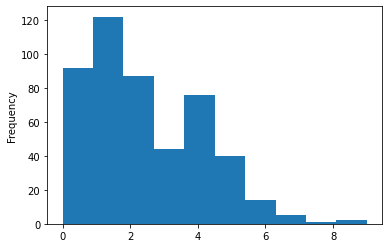

In [8]:
churn['customer service calls'].plot(kind='hist');

In [9]:
churn['customer service calls'].mean()

2.229813664596273

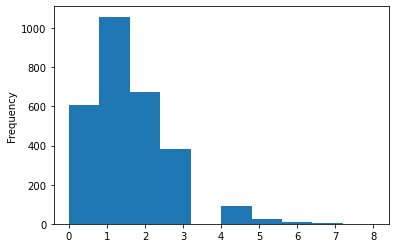

In [10]:
nchurn['customer service calls'].plot(kind='hist');

# International Plan

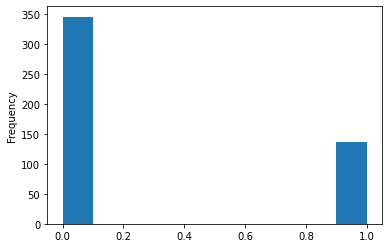

In [11]:
churn['international plan'].plot(kind='hist');

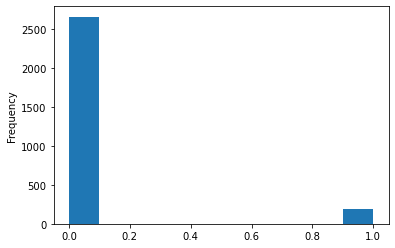

In [12]:
nchurn['international plan'].plot(kind='hist');

In [13]:
churn['international plan'].mean()

0.2836438923395445

# Total Day Minutes

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Total Day Minues'),
 Text(0, 0.5, 'Probability of Customer Churn')]

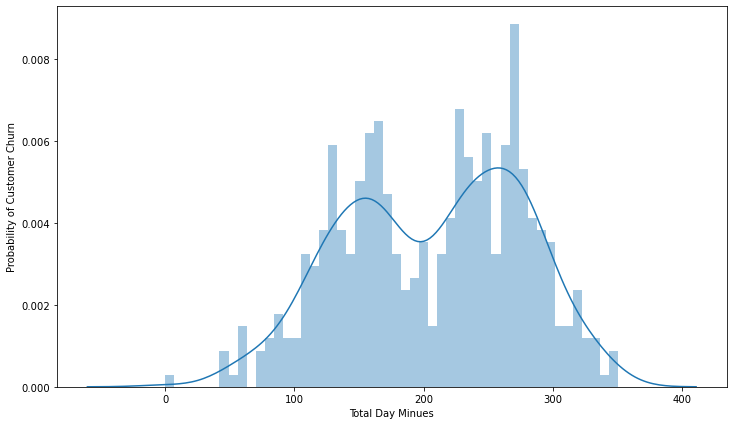

In [14]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.distplot(churn['total day minutes'], bins=50);

ax.set(xlabel='Total Day Minues', ylabel='Probability of Customer Churn')

In [15]:
churn['total day minutes'].describe()

count    483.000000
mean     206.914079
std       68.997792
min        0.000000
25%      153.250000
50%      217.600000
75%      265.950000
max      350.800000
Name: total day minutes, dtype: float64

In [16]:
clean['total day minutes'].describe()

count    3333.000000
mean      179.775098
std        54.467389
min         0.000000
25%       143.700000
50%       179.400000
75%       216.400000
max       350.800000
Name: total day minutes, dtype: float64

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Total Day Minues'), Text(0, 0.5, 'Denisity')]

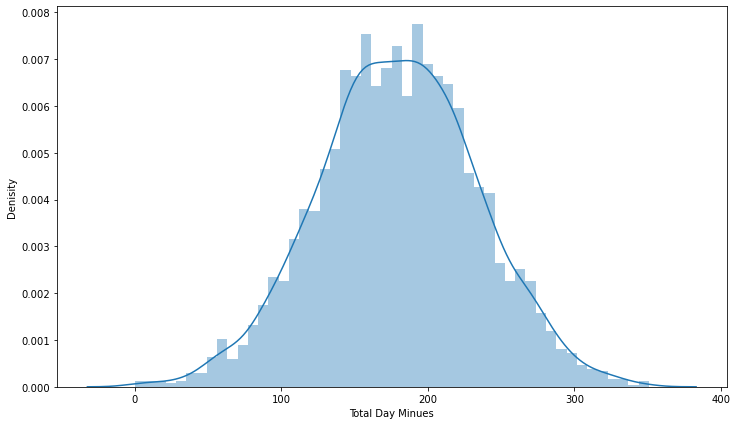

In [17]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.distplot(clean['total day minutes'], bins=50);

ax.set(xlabel='Total Day Minues', ylabel='Denisity')

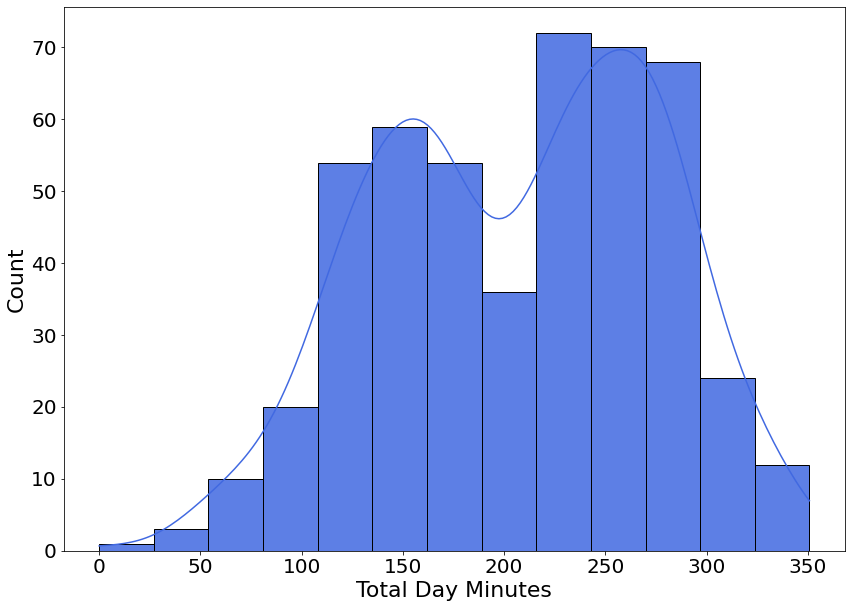

In [18]:
fig, ax = plt.subplots(figsize=(14, 10))

sns.histplot(data = churn
            ,x = 'total day minutes'
            ,kde = True
            ,color='royalblue'
            ,alpha=0.85)

plt.xticks(fontsize=20)
plt.xlabel('Total Day Minutes', size=22)
plt.ylabel('Count', size=22)
plt.yticks(fontsize=20)
plt.show(fig);

# NOT USING THIS ANYMORE Total Day Charge

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Total Day Charge'),
 Text(0, 0.5, 'Probability of Customer Churn')]

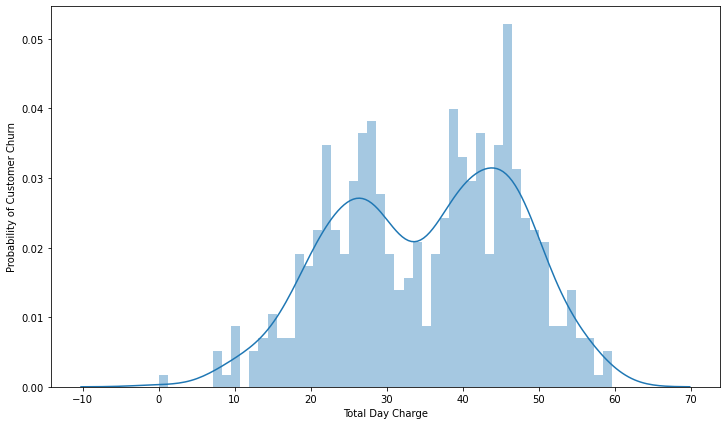

In [19]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.distplot(churn['total day charge'], bins=50);

ax.set(xlabel='Total Day Charge', ylabel='Probability of Customer Churn')

# Total Evening Charge

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Total Evening Charge'),
 Text(0, 0.5, 'Probability of Customer Churn')]

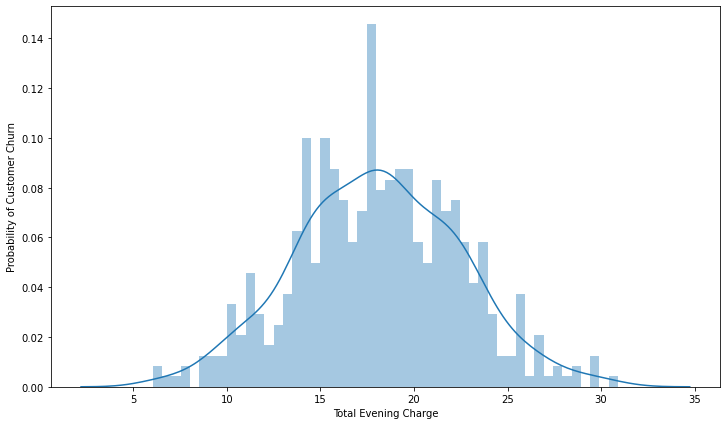

In [20]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.distplot(churn['total eve charge'], bins=50);

ax.set(xlabel='Total Evening Charge', ylabel='Probability of Customer Churn')

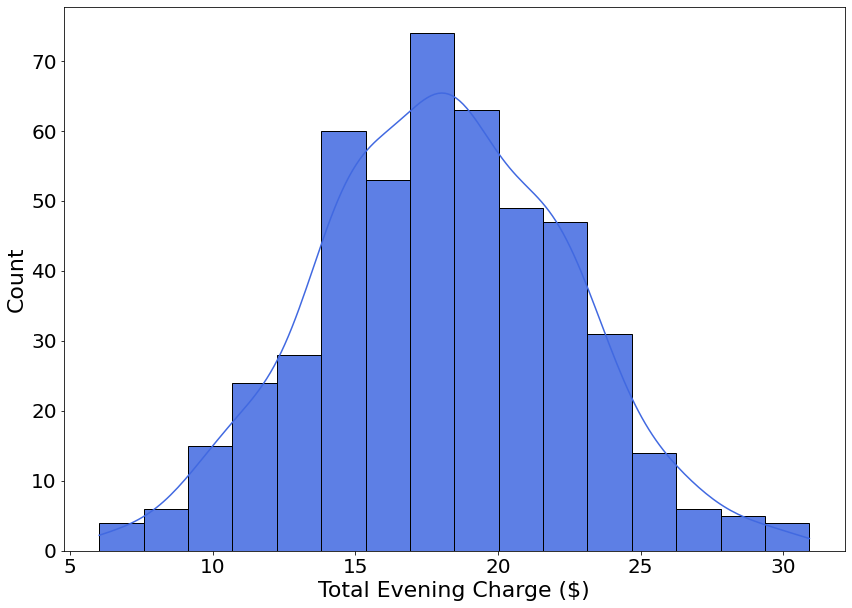

In [21]:
fig, ax = plt.subplots(figsize=(14, 10))

sns.histplot(data = churn
            ,x = 'total eve charge'
            ,kde = True
            ,color='royalblue'
            ,alpha=0.85)

plt.xticks(fontsize=20)
plt.xlabel('Total Evening Charge ($)', size=22)
plt.ylabel('Count', size=22)
plt.yticks(fontsize=20)
plt.show(fig);

In [22]:
churn['total eve charge'].describe()

count    483.000000
mean      18.054969
std        4.396762
min        6.030000
25%       15.055000
50%       17.960000
75%       21.205000
max       30.910000
Name: total eve charge, dtype: float64

<AxesSubplot:xlabel='number vmail messages', ylabel='Count'>

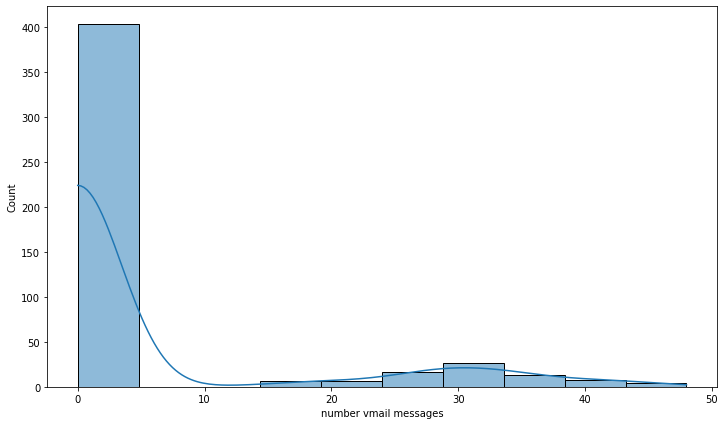

In [23]:
fig, ax = plt.subplots(figsize=(12, 7))

sns.histplot(data = churn
            ,x = 'number vmail messages'
            ,kde = True
            )

In [24]:
churn['number vmail messages'].describe()

count    483.000000
mean       5.115942
std       11.860138
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       48.000000
Name: number vmail messages, dtype: float64

In [25]:
clean['total intl charge'].describe()

count    3333.000000
mean        2.764581
std         0.753773
min         0.000000
25%         2.300000
50%         2.780000
75%         3.270000
max         5.400000
Name: total intl charge, dtype: float64